# Checking what operating range is required of the heat pump

57
64
Number of fan coils required: 64


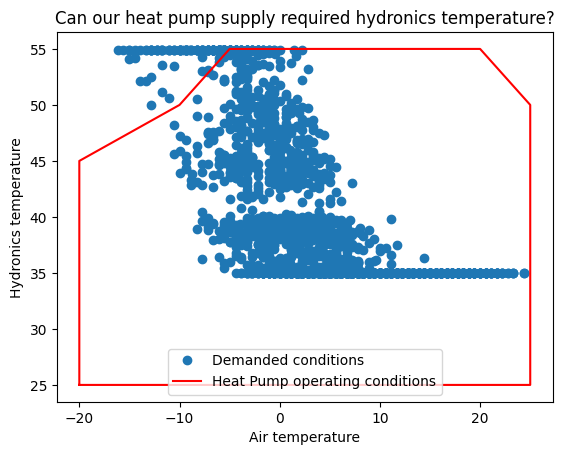

In [1]:
from Modules.Heating import Heating_Distribution
import Modules.Data as Data
import matplotlib.pyplot as plt
import numpy as np

heat_pump_capacity = 305
HVAC_capacity = 175

HD = Heating_Distribution("Data/HFP-550LM-Z1", heat_pump_capacity, HVAC_capacity)

air_temp = Data.column_from_csv("Data/XL-BES-Tool_Output.csv", "External temperture (ºC)") 
heating_demand = Data.column_from_csv("Data/XL-BES-Tool_Output.csv", "Heating_thermal_load(kW)")  

heating_demand = np.clip(heating_demand, 0, heat_pump_capacity)

indices = [i for i, x in enumerate(heating_demand) if x == 0]
heating_demand = np.delete(heating_demand, indices)
air_temp = np.delete(air_temp, indices)

hydronics_temp = HD.interp_flow_temp_heating(heating_demand)

plt.plot(air_temp, hydronics_temp, marker="o", label="Demanded conditions", linestyle="None")

# HP operating conditions

air_temp_op_conditions = np.array([-20, 25, 25, 20, 20, -5, -10, -20, -20])
hydronics_temp_op_conditions = np.array([25, 25, 50, 55, 55, 55, 50, 45, 25])
plt.plot(air_temp_op_conditions, hydronics_temp_op_conditions, color="red", label="Heat Pump operating conditions")
plt.xlabel("Air temperature")
plt.ylabel("Hydronics temperature")
plt.title("Can our heat pump supply required hydronics temperature?")
plt.legend()

57
64
Number of fan coils required: 64
2740
2740
[12  7]
[117.762 177.84 ]


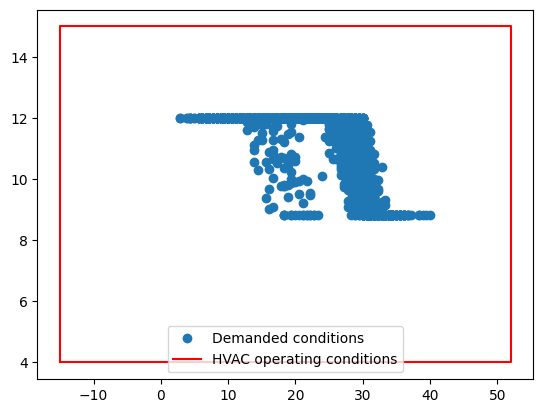

In [ ]:
from Modules.Heating import Heating_Distribution
import Modules.Data as Data
import matplotlib.pyplot as plt
import numpy as np

heat_pump_capacity = 305
HVAC_capacity = 175

HD = Heating_Distribution("Data/HFP-550LM-Z1", heat_pump_capacity, HVAC_capacity)

# Cooling conditions

plt.figure(2)

air_temp = Data.column_from_csv("Data/XL-BES-Tool_Output.csv", "External temperture (ºC)") 
cooling_demand = Data.column_from_csv("Data/XL-BES-Tool_Output.csv", "Cooling_thermal_load(kW)")  

cooling_demand = np.clip(cooling_demand, 0, HVAC_capacity)

indices = [i for i, x in enumerate(cooling_demand) if x == 0]
cooling_demand = np.delete(cooling_demand, indices)
air_temp = np.delete(air_temp, indices)

hydronics_temp = HD.interp_flow_temp_cooling(cooling_demand)

plt.plot(air_temp, hydronics_temp, marker="o", label="Demanded conditions", linestyle="None")

air_temp_op_conditions = np.array([-15, -15, 52, 52, -15])
hydronics_temp_op_conditions = np.array([4, 15, 15, 4, 4])
plt.plot(air_temp_op_conditions, hydronics_temp_op_conditions, color="red", label="HVAC operating conditions")
plt.legend()

# Generating plot with interpolated COP values for Heat Pump

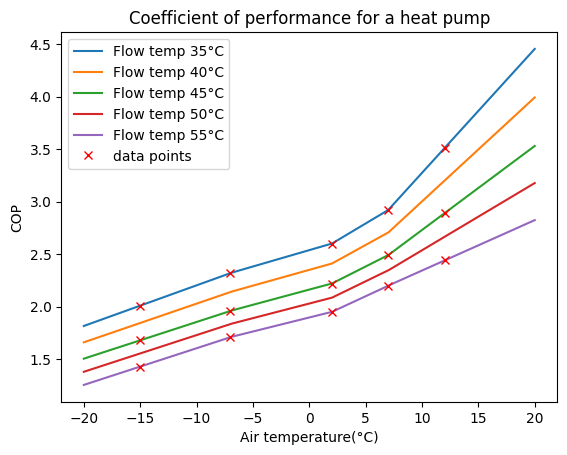

In [4]:
from Modules.Heating import Heat_Pump
# from scipy.interpolate import RegularGridInterpolator as Interpolator
import matplotlib.pyplot as plt
import numpy as np

Heat_Pump = Heat_Pump("Data/Heat_Pump/EcoAir622M.csv")

COP_interp = Heat_Pump.interp_init("COP")

air_temp = np.linspace(-20, 20, 1000)
hydronics_temp = [35, 40, 45, 50, 55]

for output_temp in hydronics_temp:

    COP = Heat_Pump.Calculate_COP(output_temp, air_temp, COP_interp)
    
    plt.plot(air_temp, COP, label = 'Flow temp ' + str(output_temp) + '°C')
    
# data points
data_air_temp = np.array([12, 12, 12, 7, 7, 7, 2, 2, 2, -7, -7, -7, -15, -15, -15])
data_flow_temp = np.array([35, 45, 55, 35, 45, 55, 35, 45, 55, 35, 45, 55, 35, 45, 55])

data_COP = Heat_Pump.Calculate_COP(data_flow_temp, data_air_temp, COP_interp)

plt.plot(data_air_temp, data_COP, label = "data points", marker='x', color='red', linestyle='None')

plt.title('Coefficient of performance for a heat pump')
plt.xlabel('Air temperature(°C)')
plt.ylabel('COP')
plt.legend()

# Calculating annual electricity usage by heating system and effective SCOP

Total electricity usage 114051.4924034077 kWh/yr
Effective COP: 2.9954158669982696


Text(0, 0.5, 'Capped heating requirement (kW)')

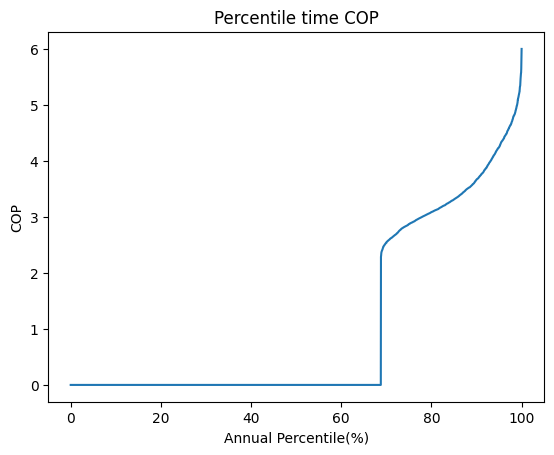

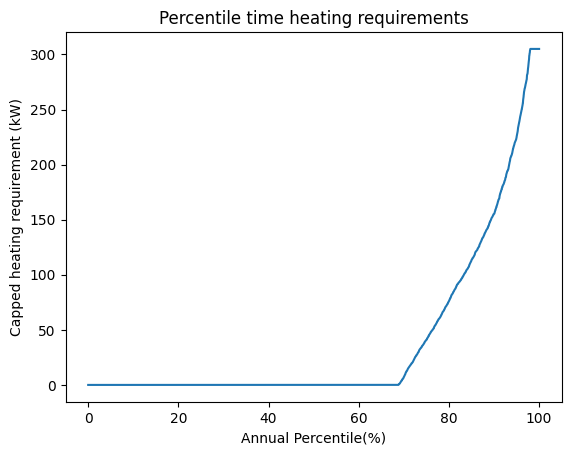

In [5]:
from Modules.Heating import Heat_Pump
from Modules.Heating import HP_Controller
from Modules.Heating import Const_Temp_Heating_Distribution
import numpy as np
import matplotlib.pyplot as plt

max_heat_pump_power = 305 # in kW

Heat_Pump = Heat_Pump("Data/Heat_Pump/EcoAir622M.csv")

Controller = HP_Controller(Heat_Pump, Const_Temp_Heating_Distribution, max_heat_pump_power)

time, heating, electricity, COP, air_temp, hydronics_temp = Controller.controller()

print('Total electricity usage ' + str(np.sum(electricity)) + ' kWh/yr')

effective_COP = np.sum(heating) / np.sum(electricity)
print('Effective COP: ' + str(effective_COP))


# Plotting stuff - maybe don't need now?

# When heating is zero set COP to 0
indices = [i for i, x in enumerate(heating) if x == 0]
COP[indices] = 0

plt.figure(0)
plt.plot(100 * time / np.max(time), np.sort(COP))
plt.title("Percentile time COP")
plt.xlabel('Annual Percentile(%)')
plt.ylabel('COP')
# plt.figure(1)
# plt.plot(time, heating)
# plt.figure(2)
# plt.plot(time, electricity)
plt.figure(3)
plt.plot(100 * time / np.max(time), np.sort(heating))
# plt.plot(99, 305, marker='x', color='red')
plt.title('Percentile time heating requirements')
plt.xlabel('Annual Percentile(%)')
plt.ylabel('Capped heating requirement (kW)')